In [1]:
import pandas as pd  # データの加工用のパッケージ
from sklearn import datasets  # サンプルデータセットをインポートするためのモジュール
# (1)k近傍法を行うためのクラスをインポートしてください
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split  # ホールドアウト法を行うための関数

wine = datasets.load_wine()  # ワインデータの読込

dat = pd.DataFrame(data=wine.data, columns=wine.feature_names)  # ワインデータを表形式に変換
dat['target'] = wine.target  # ターゲットを表に追加

# 特徴量とターゲットの設定
X = dat[['alcohol', 'malic_acid']].values  # 特徴量の設定
y = dat['target']  # ターゲットの設定

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                         random_state=0)
# 学習
# (2)k近傍法のインスタンスを作成してください（近傍点の数は3個）
knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
# (3)k近傍法のモデルに学習を行わせてください
knn.fit(X_train, y_train)

# (4)y_predに分類結果（ラベル）を格納してください
y_pred = knn.predict(X_test)

# 分類結果の表示
print("分類結果の確認")
print(pd.DataFrame({'y': y_test, 'y_pred': y_pred}).head())  # 実際のクラスと分類結果を上から5つだけ表示
print()

# (5)モデルの精度（正解率）の確認を行ってください
print('正解率:', knn.score(X_test, y_test))

分類結果の確認
     y  y_pred
54   0       0
151  2       2
63   1       1
55   0       0
123  1       2

正解率: 0.8148148148148148


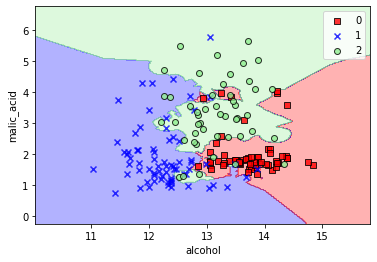

In [2]:
# 参考
# 以下は識別境界の描画です
import numpy as np  # 数値計算のためのパッケージ
import matplotlib.pyplot as plt  # 可視化を行うためのモジュール
from matplotlib.colors import ListedColormap  # カラーマップを作るためのクラス

markers = ('s', 'x', 'o')  # マーカーの準備
colors = ('red', 'blue', 'lightgreen')  # 色の準備
cmap = ListedColormap(colors[: len(np.unique(y))])  # カラーマップの色を設定

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 横軸の範囲
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 縦軸の範囲
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))  # 座標の作成

Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # 各座標ごとの予測結果を格納
Z = Z.reshape(xx1.shape)  # 予測結果を各座標の形に整形

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)  # カラーマップを描画
plt.xlim(xx1.min(), xx1.max())  # 横軸の描画範囲の設定
plt.ylim(xx2.min(), xx2.max())  # 縦軸の描画範囲の設定

# 予測値に対する散布図の描画
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolors='black')

plt.xlabel("alcohol")  # 横軸のラベル
plt.ylabel("malic_acid")  # 縦軸のラベル
plt.legend(loc='upper right')  # 凡例の位置
plt.show()  # グラフの表示